In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data      # 第一次运行会自动下载到代码所在的路径下
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)  #导入数据

In [13]:
def model1():             #softmax回归模型 
    #建立模型
    import numpy as np
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline
    x = tf.placeholder("float",[None,784],name='x')#占位符  表示可以放入n*784
    W = tf.Variable(tf.zeros([784,10]),name='W')#初始化权值，全为0
    b = tf.Variable(tf.zeros([10]),name='b')#初始化偏置，全为0
    y = tf.nn.softmax(tf.matmul(x,W)+b,name='y')#定义模型（也就分类器）

    #训练模型
    y_ = tf.placeholder("float",[None,10]) #实际的分布（我们输入的one-hot vector)
    cross_entropy = -tf.reduce_sum(y_*tf.log(y))#计算交叉熵，可以认为是Loss
    #梯度下降函数来优化模型
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

    #初始化变量
    init = tf.global_variables_initializer()
    #启动模型
    sess = tf.Session()
    sess.run(init)
    #评估模型
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    #返回一组布尔值，y为预测的标签值，y_为真实的标签值
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
    #输出准确度

    for i in range(20000):
        batch_xs,batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs,y_: batch_ys})
        if(i%100==0):                  #每训练100次，测试一次
            print (f"time={i:^5},accuracy:",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    print ("最终accuracy：",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    #保存模型
    saver = tf.train.Saver()
    saver.save(sess, "./Model1/Model1")
    
    #识别自己手写的图片
    #图片预处理
    test_image = cv2.imread("./test-images/1.png",0) #导入图片,变成灰度图
    test_image = np.float32(test_image)  
    test_image = 255 - test_image   #取反，将白底黑字变成黑底白字
    plt.imshow(test_image, cmap="gray")
    print(test_image.shape)
    test_image = np.reshape(test_image,[1,784])  
    #识别开始
    feed_dict = {x:test_image}    
    print(sess.run(y,feed_dict=feed_dict))
    test_out = tf.argmax(y,axis=1)
    print(sess.run(test_out, feed_dict=feed_dict))
    
    

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
time=  0  ,accuracy: 0.348
time= 100 ,accuracy: 0.8926
time= 200 ,accuracy: 0.8998
time= 300 ,accuracy: 0.9028
time= 400 ,accuracy: 0.8925
time= 500 ,accuracy: 0.9134
time= 600 ,accuracy: 0.9047
time= 700 ,accuracy: 0.8994
time= 800 ,accuracy: 0.8869
time= 900 ,accuracy: 0.9172
time=1000 ,accuracy: 0.917
time=1100 ,accuracy: 0.9164
time=1200 ,accuracy: 0.9203
time=1300 ,accuracy: 0.9195
time=1400 ,accuracy: 0.9202
time=1500 ,accuracy: 0.9116
time=1600 ,accuracy: 0.9177
time=1700 ,accuracy: 0.918
time=1800 ,accuracy: 0.917
time=1900 ,accuracy: 0.9139
time=2000 ,accuracy: 0.9184
time=2100 ,accuracy: 0.9202
time=2200 ,accuracy: 0.9095
time=2300 ,accuracy: 0.9162
time=2400 ,accuracy: 0.9159
time=2500 ,accuracy: 0.9091
time=2600 ,accuracy: 0.918
time=2700 ,accuracy: 0.92
time=2800 ,accuracy: 

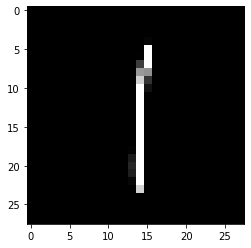

In [16]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data     
mnist = input_data.read_data_sets('./MNIST_data/', one_hot=True) 
model1()

(28, 28)
INFO:tensorflow:Restoring parameters from ./Model1/Model1
[[0.000000e+00 0.000000e+00 0.000000e+00 9.999994e-01 0.000000e+00
  5.867339e-07 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]
[3]


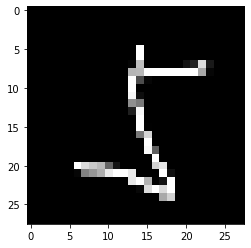

In [12]:
#利用保存好的模型，进行识别
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#图片的预处理
test_image = cv2.imread("./test-images/55.png",cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image,(28,28))
test_image = np.float32(test_image)
test_image = 255 - test_image
plt.imshow(test_image, cmap="gray")
print(test_image.shape)
test_image = np.reshape(test_image,[1,784])

#加载模块
with tf.Session()as sess:
    saver = tf.train.import_meta_graph("./Model1/Model1.meta")
    saver.restore(sess,tf.train.latest_checkpoint("./Model1/"))
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("x:0")
    feed_dict = {x:test_image}
    y = graph.get_tensor_by_name("y:0")
    print(sess.run(y,feed_dict=feed_dict))
    test_out = tf.argmax(y,axis=1)
    print(sess.run(test_out, feed_dict=feed_dict))
